# Visualise results

To first visualise the output of our model, I create a plot of the test images that I found and used the model on them.</br>
We can see from the results that this is not accurate which makes it important for us to look at all of the charts

WARNING ⚠️ 'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 /Users/joepdekock/Documents/school/sem7/Final_datachallenge/Code/ipynb/test-images/images.jpg: 576x640 1 Tank, 87.9ms
Speed: 3.7ms preprocess, 87.9ms inference, 5.8ms postprocess per image at shape (1, 3, 576, 640)
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 /Users/joepdekock/Documents/school/sem7/Final_datachallenge/Code/ipynb/test-images/test4.jpg: 448x640 1 Jumpsuit, 55.6ms
Speed: 1.8ms preprocess, 55.6ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 /Users/joepdekock/Documents/school/sem7/Final_datachallenge/Code/ipynb/test-images/test1.jpg: 384x640 (no detections), 42.0ms
Speed: 4.1ms preprocess, 42.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384

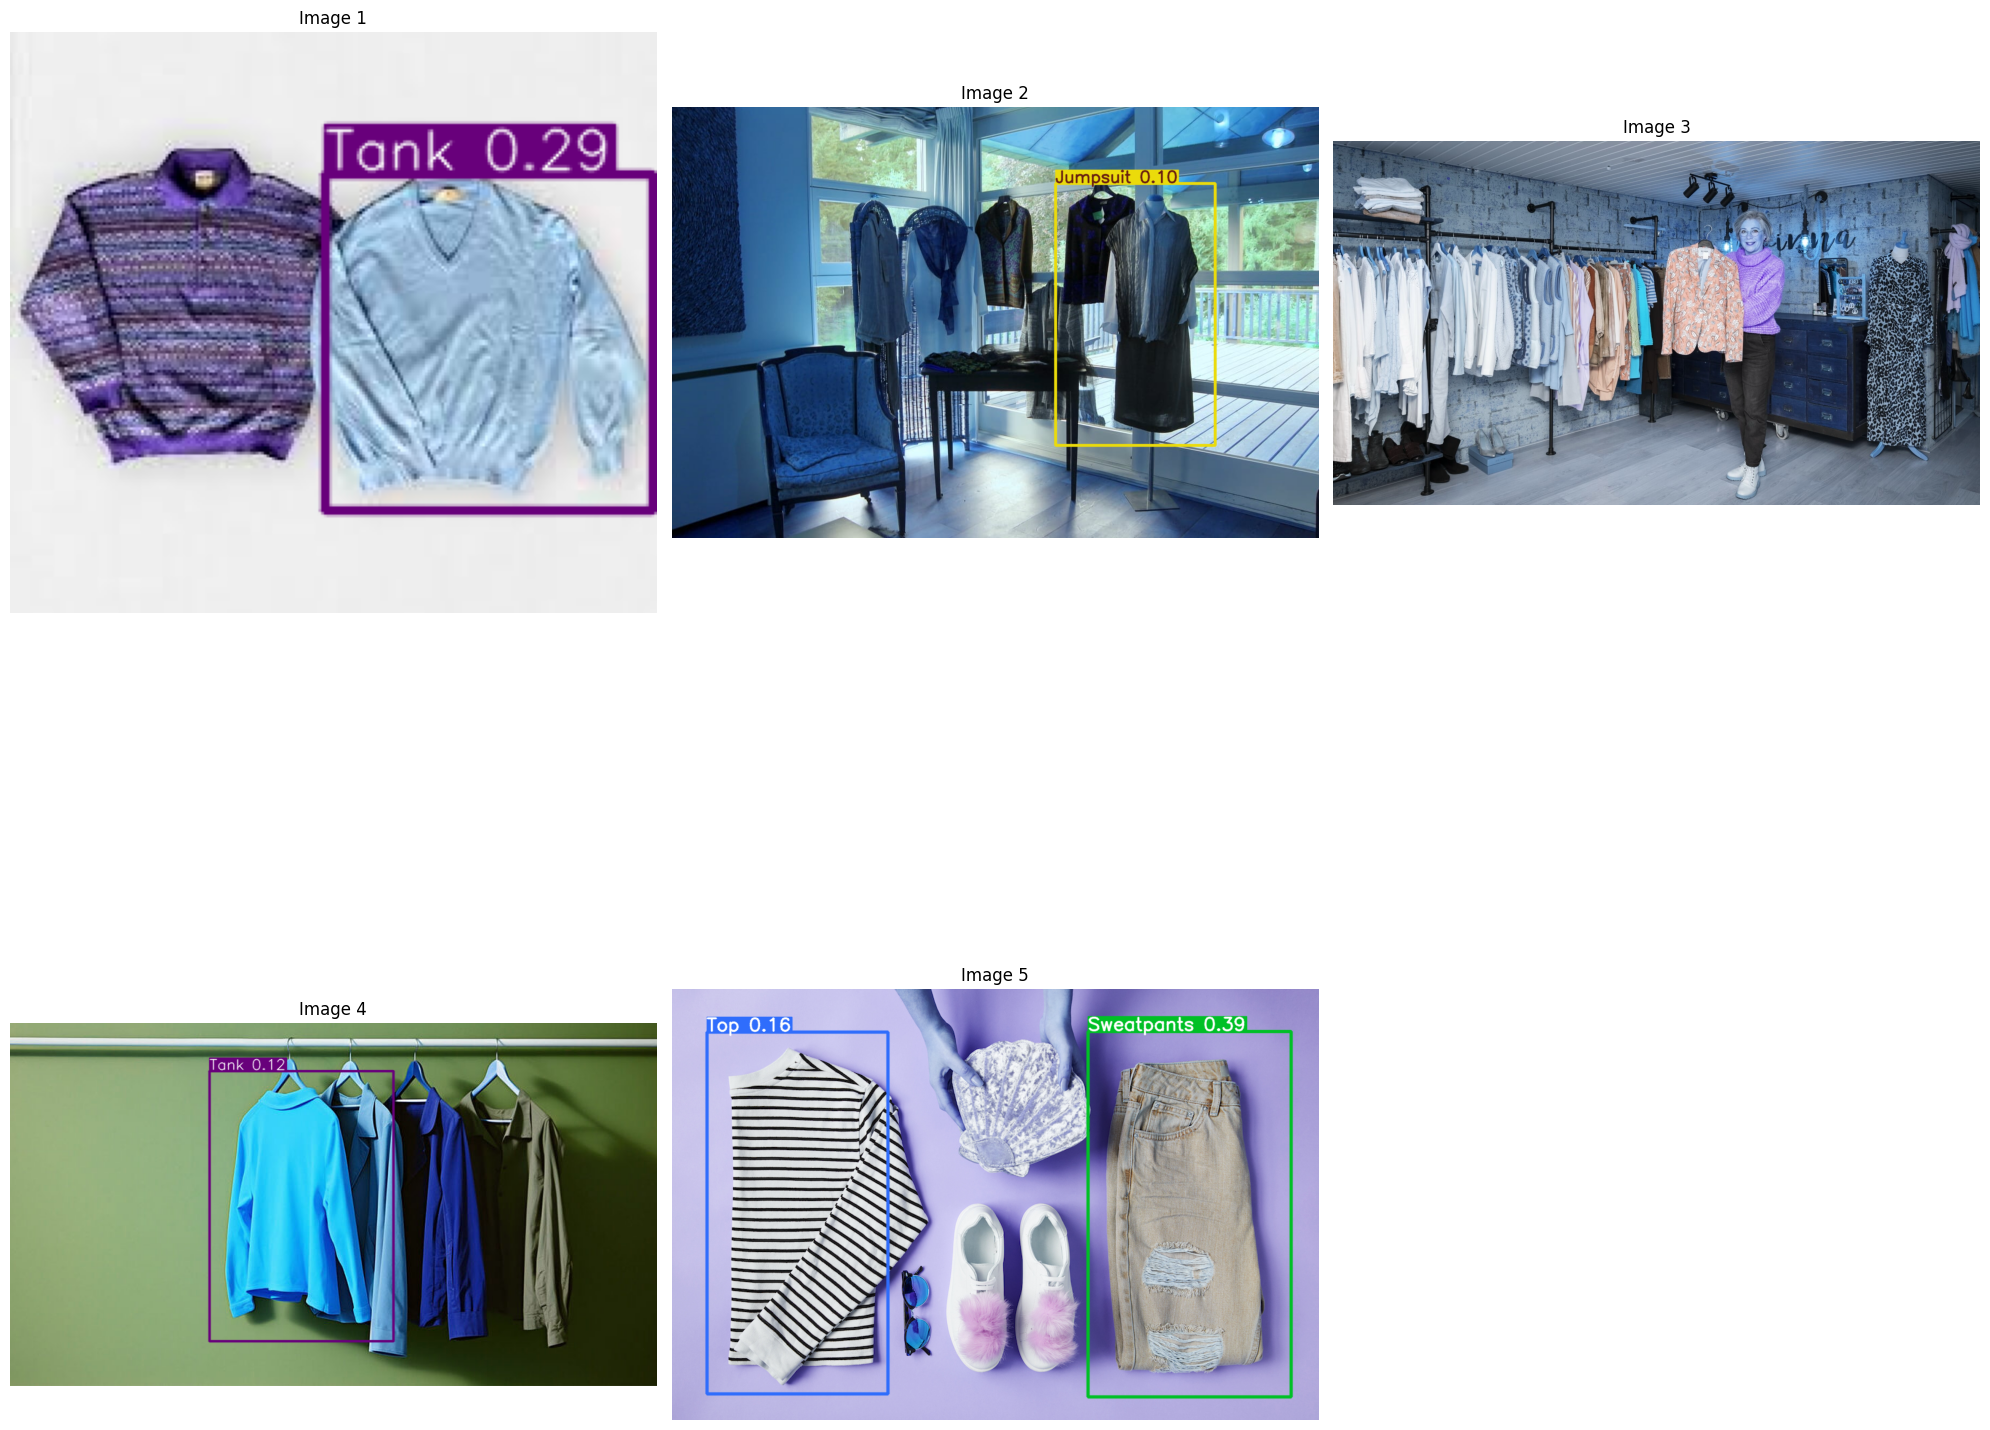

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from ultralytics import YOLO
plt.figure(figsize=(20, 20))

# Randomly select 6 images
imgs = random.sample(os.listdir("test-images/"), 5)
newModel = YOLO("best.pt")
# Counter for subplots
c = 1

for img in imgs:
    # Full path to the image
    img_path = os.path.join("test-images/", img)
    
    # Perform prediction
    results = newModel.predict(source=img_path, conf=0.1, save=False, line_thickness=2)  # save=False avoids saving
    
    # Extract the plotted image directly from the results
    for result in results:
        # Convert the result into an image (NumPy array)
        im_array = result.plot()  # 'plot()' returns an image array with the detections drawn

        # Plot the image in the grid
        plt.subplot(2, 3, c)
        plt.axis('off')
        plt.imshow(im_array)  # Display the modified image
        plt.title(f"Image {c}")
        c += 1

plt.tight_layout()
plt.show()

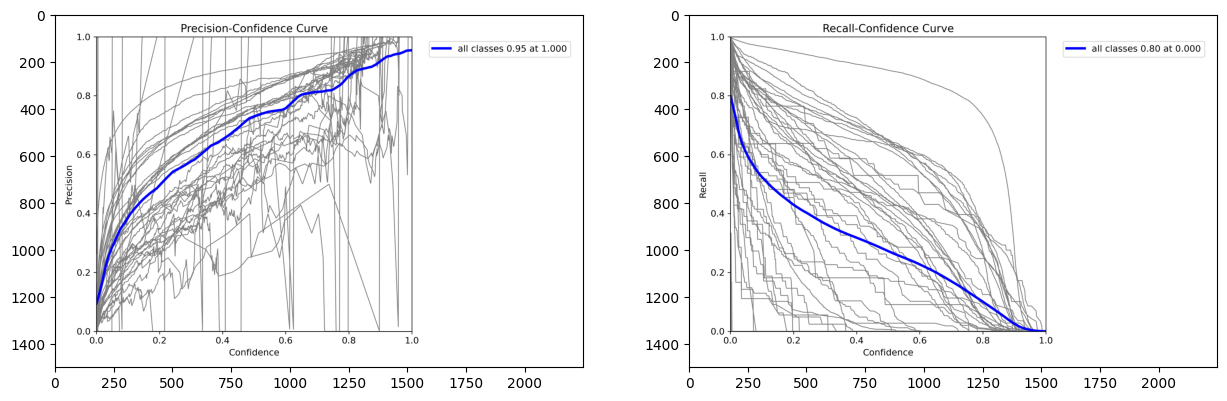

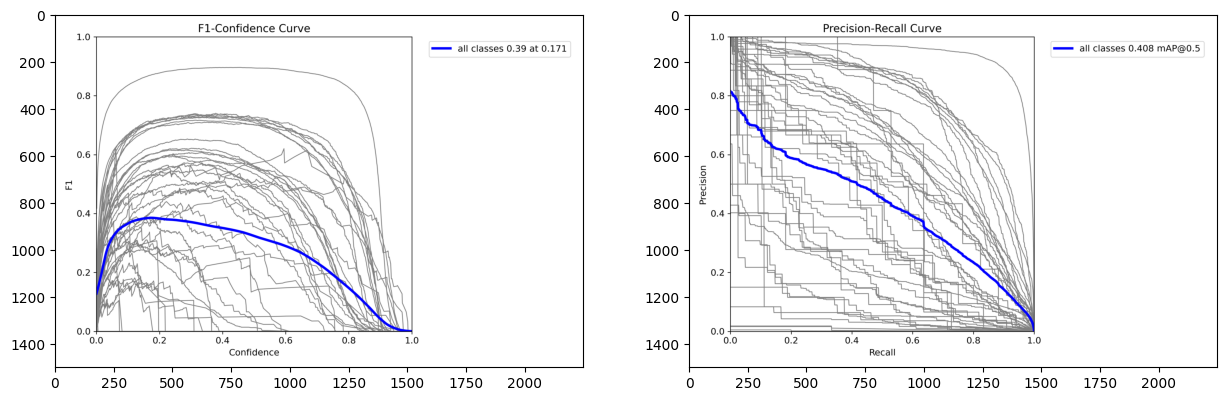

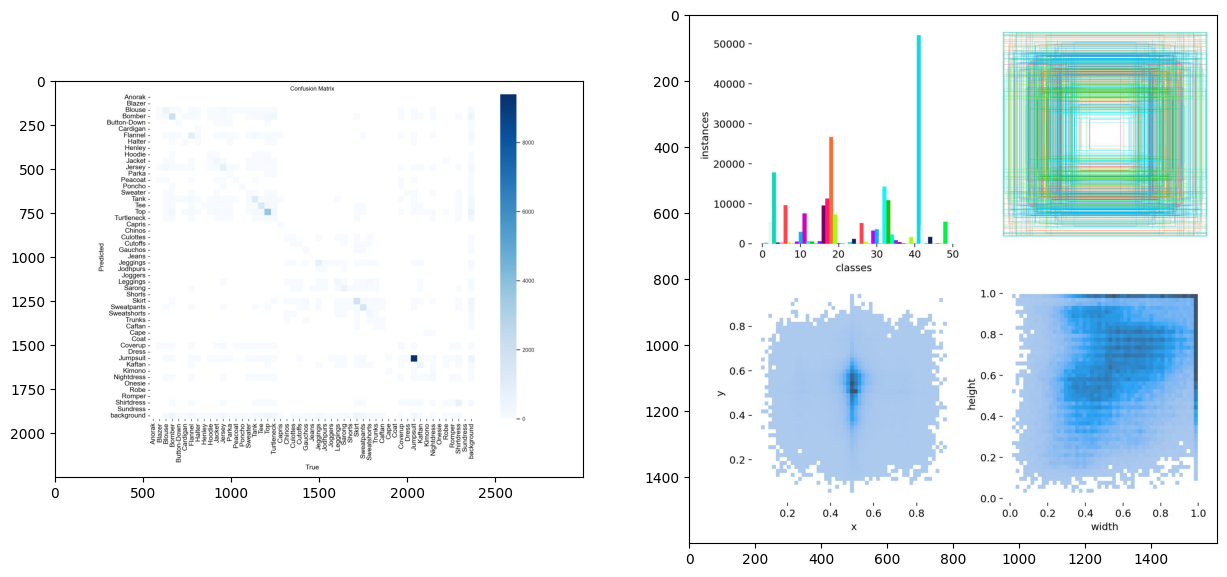

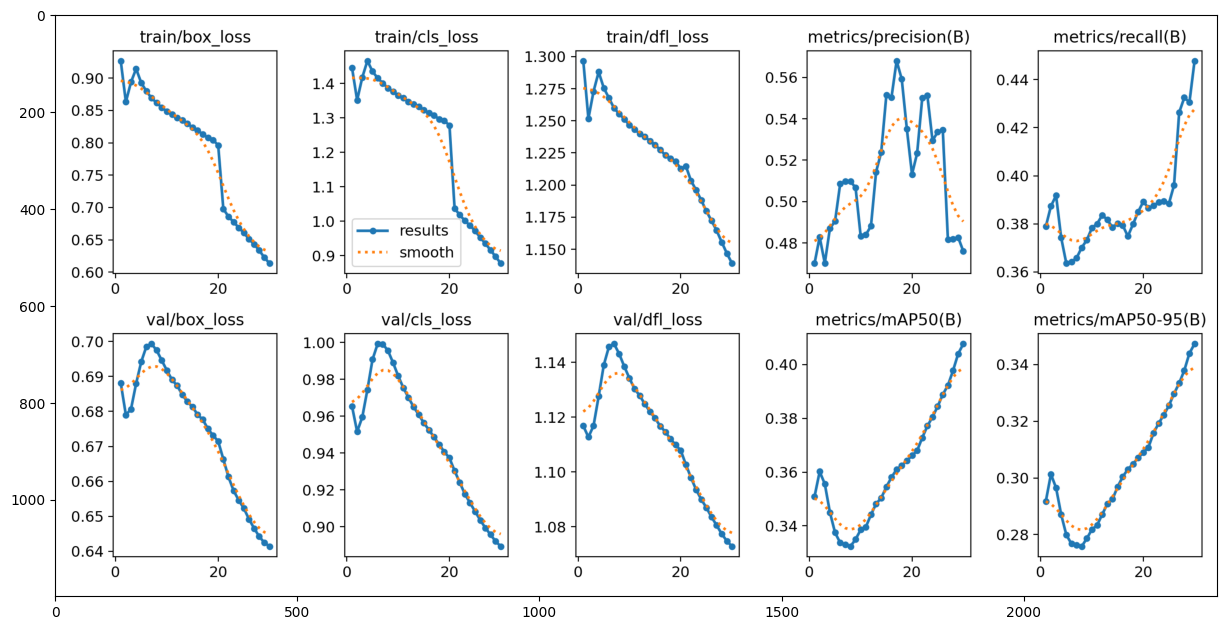

In [2]:
%matplotlib inline
model_path = 'runs/detect/train18/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

What we can see from the charts is that the accuracy was still going up when I was done training, meaning that it would benefit the model if we training with more epochs.</br> The problem with this is that the 60 epochs that I ran already to 60 hours, and I dont have the time and money to spend more on this.</br> Which is why we have to make use of what we have, which is an accuracy of about .95 on the eval data. </br> In the front end we can see how good this translates over to using it with a webcam.